In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
sys.path.append('../')

import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

from src.data.dataset import SatelliteImageDataset, get_split_image_files

DATA_PATH = '../data/'
MAXAR_PRE_PATH = DATA_PATH + 'maxar/pre/'

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
Image.MAX_IMAGE_PIXELS = 303038464

In [4]:
train_image_files, _, _ = get_split_image_files(MAXAR_PRE_PATH)
dataset = SatelliteImageDataset(image_files=train_image_files)

In [5]:
it = iter(dataset)

0.05247774
3412.3657


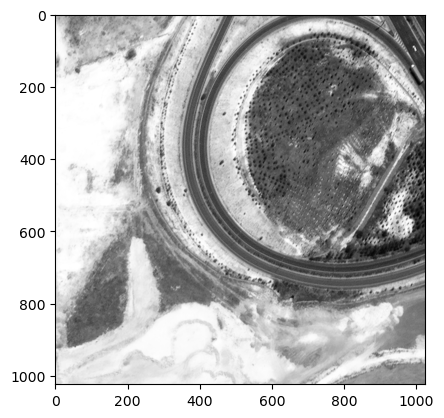

In [14]:
patch = next(it)
mean_patch = np.mean(np.array(patch), axis=0)
non_black_pixels = mean_patch[mean_patch > 0]
variance = np.var(non_black_pixels)
print(variance, flush=True)
variance = np.var(non_black_pixels * 255)
print(variance, flush=True)
plt.imshow(mean_patch, cmap='gray')
plt.show()